# TP 2 - Classification diabiete

## Chargement et aperçu du jeu de données

In [120]:
# 1.1 - Import des bibliothèques de base
import pandas as pd

# 1.2 - Chargement du dataset
df = pd.read_csv("diabetes.csv")  # Mets le chemin complet si besoin

# 1.3 - Aperçu des premières lignes
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Nombre de lignes : 768
Nombre de colonnes : 9

Types de variables :
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Valeurs nulles par colonne :
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Statistiques descriptives :


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


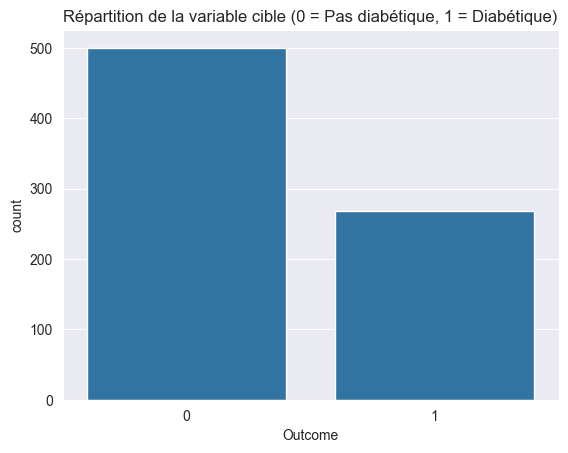

Glucose - Valeurs = 0 : 5
BloodPressure - Valeurs = 0 : 35
SkinThickness - Valeurs = 0 : 227
Insulin - Valeurs = 0 : 374
BMI - Valeurs = 0 : 11


In [2]:
# 2.1 - Dimensions du dataset
print(f"Nombre de lignes : {df.shape[0]}")
print(f"Nombre de colonnes : {df.shape[1]}")

# 2.2 - Types de données
print("\nTypes de variables :")
print(df.dtypes)

# 2.3 - Valeurs nulles (il n’y en a pas officiellement, mais on verra les zéros suspects plus tard)
print("\nValeurs nulles par colonne :")
print(df.isnull().sum())

# 2.4 - Aperçu statistique global
print("\nStatistiques descriptives :")
display(df.describe())

# 2.5 - Distribution de la variable cible
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Outcome', data=df)
plt.title("Répartition de la variable cible (0 = Pas diabétique, 1 = Diabétique)")
plt.show()

# 2.6 - Vérif rapide : y a-t-il des 0 suspects dans certaines colonnes ?
cols_to_check = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in cols_to_check:
    zero_count = (df[col] == 0).sum()
    print(f"{col} - Valeurs = 0 : {zero_count}")


On constate qu'il n'y a aucunes valeurs manquantes.
La cible à prédire est la colonne outcome et la répartition n'est pas trop déséquilibré.
Certaines valeurs à zéro sont irréalistes : glycémie et pression à zéro sont incompatibles avec la vie. Une épaisseur de peau ou un BMI à zéro est biologiquement impossible. Un taux d’insuline à zéro indique souvent une donnée manquante.
On va donc les remplacer par NaN, puis de les imputer par la médiane avant d'entraîner un modèle fiable.

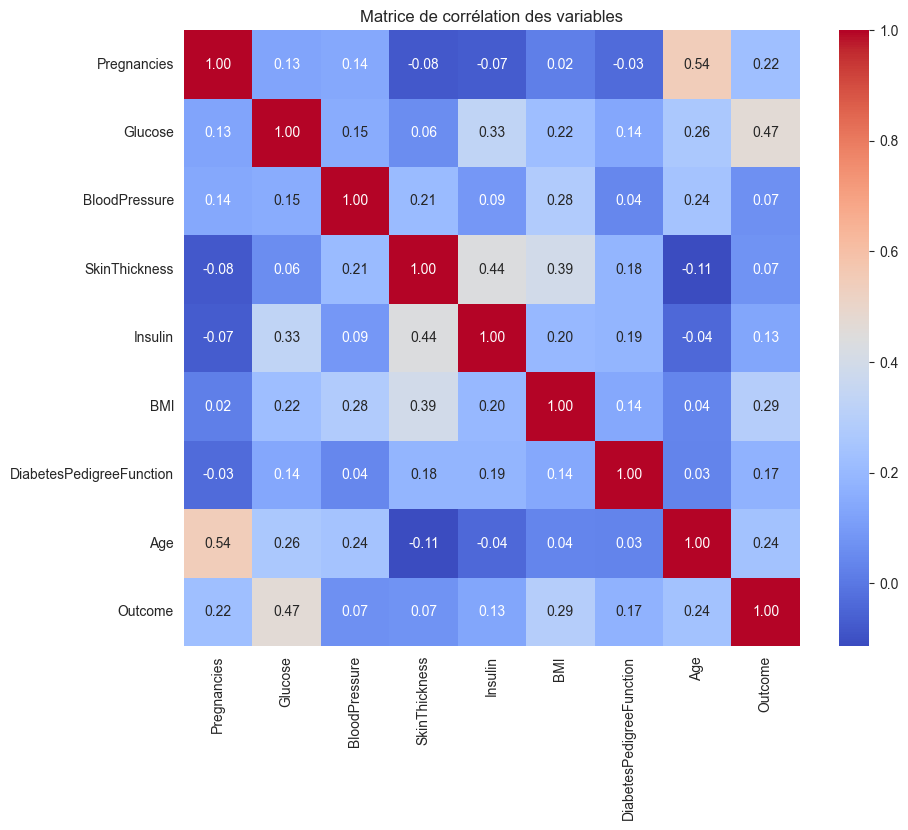

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcul de la matrice de corrélation
corr_matrix = df.corr()

# Affichage de la matrice de corrélation sous forme de heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matrice de corrélation des variables")
plt.show()

On constate que les colonnes ne sont pas complétement corréler donc nous avons decidé de garder toute les colonnes

## Split des données

In [4]:
from sklearn.model_selection import train_test_split

#Séparer features et target
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

#Séparation train vs (val + test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

#Séparation val vs test (sur le 20% restant → 50/50 → 10% chacun)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, shuffle=True
)

In [5]:
import numpy as np

# Colonnes avec des zéros aberrants
cols_with_zeros = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# Remplacement des 0 par NaN (dans X_train uniquement, puis idem sur val/test)
def replace_zeros_with_nan(df, columns):
    df = df.copy()
    for col in columns:
        df[col] = df[col].replace(0, np.nan)
    return df

X_train = replace_zeros_with_nan(X_train, cols_with_zeros)
X_val = replace_zeros_with_nan(X_val, cols_with_zeros)
X_test = replace_zeros_with_nan(X_test, cols_with_zeros)

# Imputation par la médiane (calculée sur X_train pour éviter fuite)
medians = X_train.median()

X_train = X_train.fillna(medians)
X_val = X_val.fillna(medians)
X_test = X_test.fillna(medians)

# Vérification rapide
print("Valeurs manquantes après imputation :")
print(X_train.isnull().sum())
print(X_val.isnull().sum())
print(X_test.isnull().sum())


Valeurs manquantes après imputation :
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


On remplace les zéros aberrants par NaN

On calcule la médiane uniquement sur le train

On remplace les NaN par cette médiane dans train, val, test (pas de fuite)

In [6]:
# Import de ta classe FeatureEngineering
from Utils import FeatureEngineering  # adapte le chemin si besoin

# Instanciation
fe = FeatureEngineering()

Maintenant on met en place le pipeline de sélection de modèle grace à notre classe Featuring_Engineering et GridSearch afin de sélectionner les meilleurs hyperparamètres

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# --- Pipeline RF ---
pipeline_rf = Pipeline([
    ('feature_engineering', FeatureEngineering()),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Grille de paramètres RF
param_grid_rf = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [None, 5, 10],
    'classifier__min_samples_split': [2, 5],
}

grid_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_rf.fit(X_train, y_train)

print("Meilleurs params RF :", grid_rf.best_params_)
y_val_pred_rf = grid_rf.predict(X_val)
print("Accuracy validation RF :", accuracy_score(y_val, y_val_pred_rf))
print(classification_report(y_val, y_val_pred_rf))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Meilleurs params RF : {'classifier__max_depth': 10, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Accuracy validation RF : 0.7922077922077922
              precision    recall  f1-score   support

           0       0.88      0.81      0.84        52
           1       0.66      0.76      0.70        25

    accuracy                           0.79        77
   macro avg       0.77      0.78      0.77        77
weighted avg       0.80      0.79      0.80        77



In [11]:
from xgboost import XGBClassifier

# --- Pipeline XGBoost ---
pipeline_xgb = Pipeline([
    ('feature_engineering', FeatureEngineering()),
    ('classifier', XGBClassifier(eval_metric='logloss', random_state=42))
])

# Grille de paramètres XGB
param_grid_xgb = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1],
}

grid_xgb = GridSearchCV(pipeline_xgb, param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_xgb.fit(X_train, y_train)

print("Meilleurs params XGB :", grid_xgb.best_params_)
y_val_pred_xgb = grid_xgb.predict(X_val)
print("Accuracy validation XGB :", accuracy_score(y_val, y_val_pred_xgb))
print(classification_report(y_val, y_val_pred_xgb))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Meilleurs params XGB : {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 50}
Accuracy validation XGB : 0.7402597402597403
              precision    recall  f1-score   support

           0       0.82      0.79      0.80        52
           1       0.59      0.64      0.62        25

    accuracy                           0.74        77
   macro avg       0.71      0.71      0.71        77
weighted avg       0.75      0.74      0.74        77



## Utilisation de Shap

In [60]:
import shap
import matplotlib.pyplot as plt

rf = grid_rf.best_estimator_.named_steps['classifier']
xgb = grid_xgb.best_estimator_.named_steps['classifier']

# Charger l'explainer TreeSHAP adapté aux arbres (RF et XGB)
explainer_rf = shap.TreeExplainer(rf)
explainer_xgb = shap.TreeExplainer(xgb)

# Transformer les données test avec le pipeline (juste feature_engineering)
X_test_fe = grid_rf.best_estimator_.named_steps['feature_engineering'].transform(X_val)

# Calcul SHAP
shap_values_rf = explainer_rf.shap_values(X_test_fe)
shap_values_xgb = explainer_xgb.shap_values(X_test_fe)

# 3. Pour classification binaire, shap_values est une liste avec 2 éléments (classe 0 et classe 1)
# On choisit la classe 1 (positive) pour l'interprétation
shap_values_class1_rf = shap_values_rf[:, :, 1]
shap_values_class1_xgb = shap_values_xgb[1]

## Analyse globale des variables

## Graph Watefall et summary

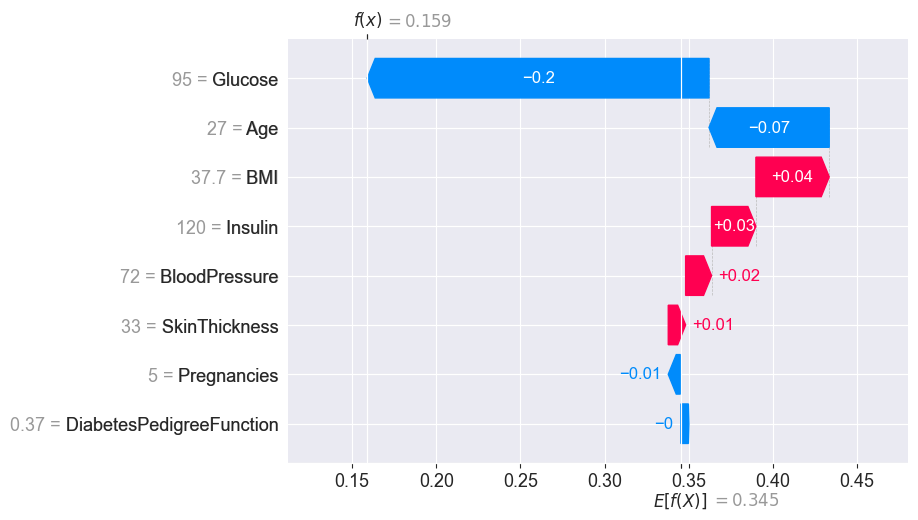

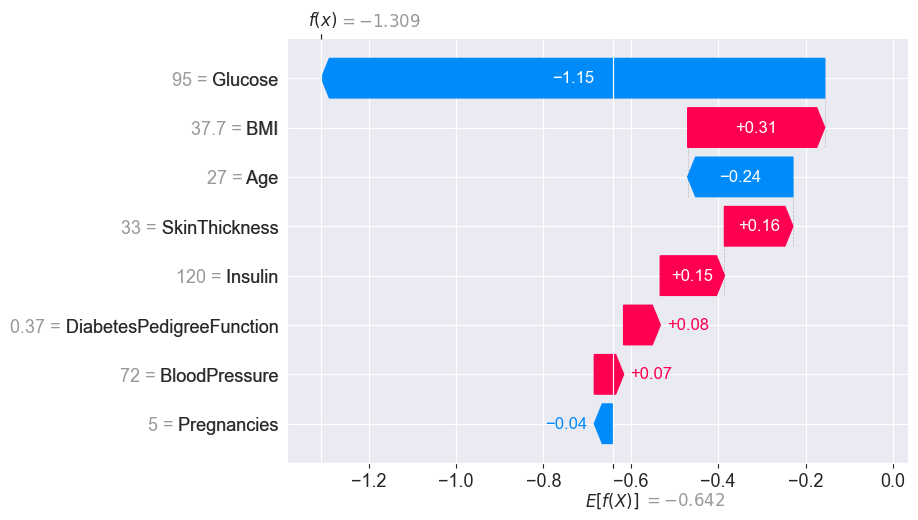

In [51]:
# SHAP waterfall pour le modèle RF
shap.waterfall_plot(shap.Explanation(
    values=shap_values_class1_rf[0],
    base_values=explainer_rf.expected_value[1],  # RF renvoie une liste (multi-class-like)
    data=X_val.iloc[0]
))

# SHAP waterfall pour le modèle XGB
shap.waterfall_plot(shap.Explanation(
    values=shap_values_xgb[0],
    base_values=explainer_xgb.expected_value,  # pas de [1] ici
    data=X_val.iloc[0]
))

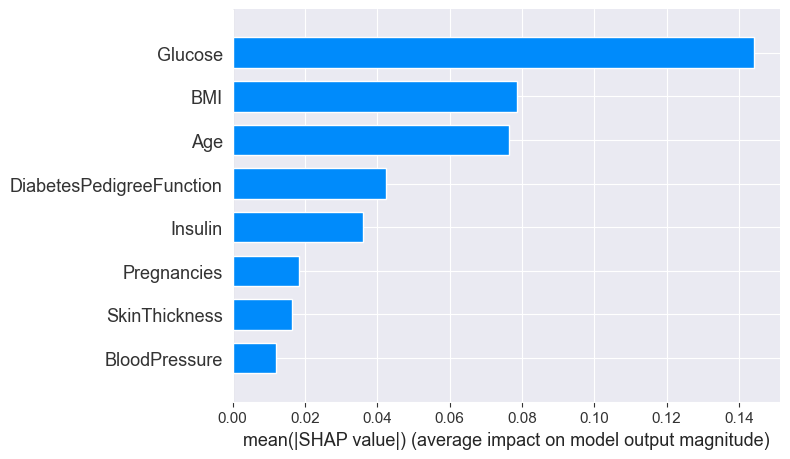

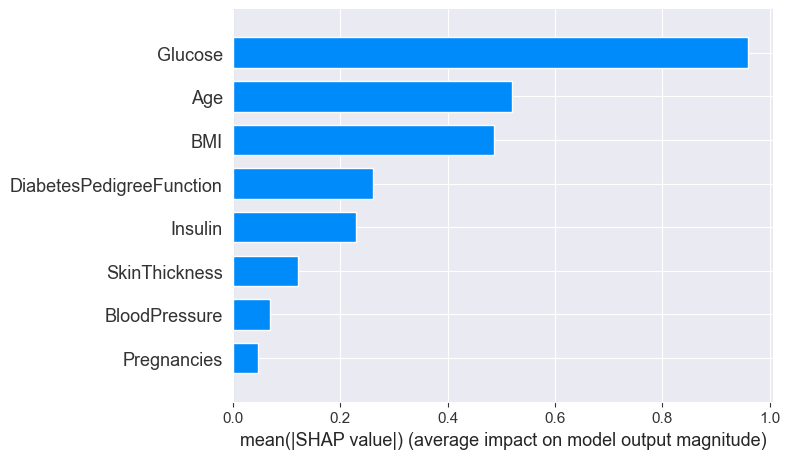

In [56]:
# Random Forest
shap.summary_plot(shap_values_class1_rf, X_test_fe, plot_type="bar", show=True)

# XGBoost
shap.summary_plot(shap_values_xgb, X_test_fe, plot_type="bar", show=True)

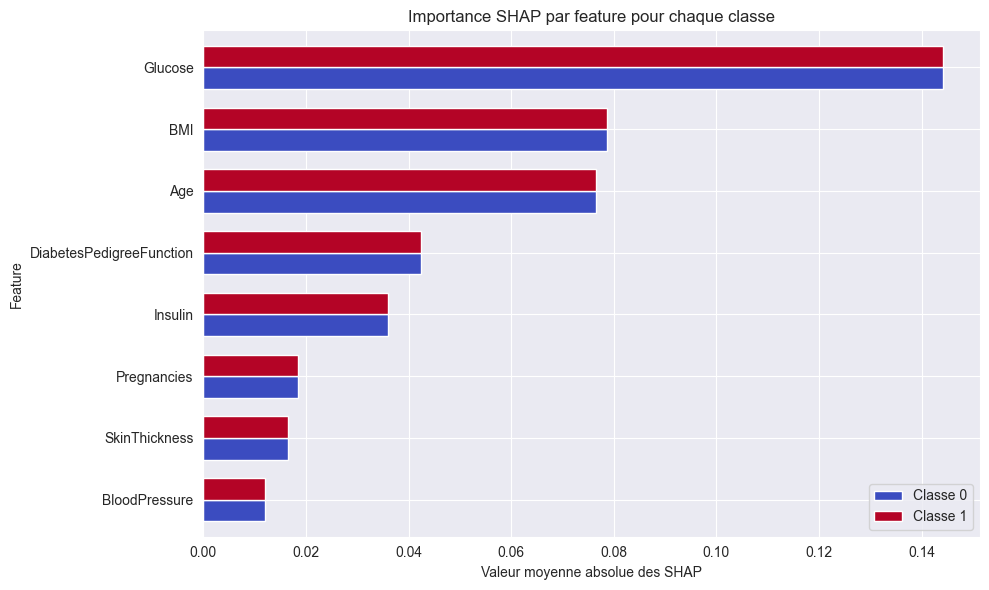

In [31]:
# Calculer les SHAP absolus moyens par classe
mean_abs_shap_class_0 = np.abs(shap_values_rf[:, :, 0]).mean(axis=0)
mean_abs_shap_class_1 = np.abs(shap_values_rf[:, :, 1]).mean(axis=0)

# Obtenir les noms des features
feature_names = X_test_fe.columns if hasattr(X_test_fe, "columns") else [f"feature_{i}" for i in range(X_test_fe.shape[1])]

# Construire un DataFrame pour visualisation
df = pd.DataFrame({
    "Feature": feature_names,
    "Classe 0": mean_abs_shap_class_0,
    "Classe 1": mean_abs_shap_class_1
}).set_index("Feature")

# Trier par importance moyenne (classe 1 par exemple)
df = df.sort_values("Classe 1", ascending=True)

# 📊 Tracé groupé
df.plot(kind="barh", figsize=(10, 6), width=0.7, colormap="coolwarm")
plt.title("Importance SHAP par feature pour chaque classe")
plt.xlabel("Valeur moyenne absolue des SHAP")
plt.tight_layout()
plt.show()

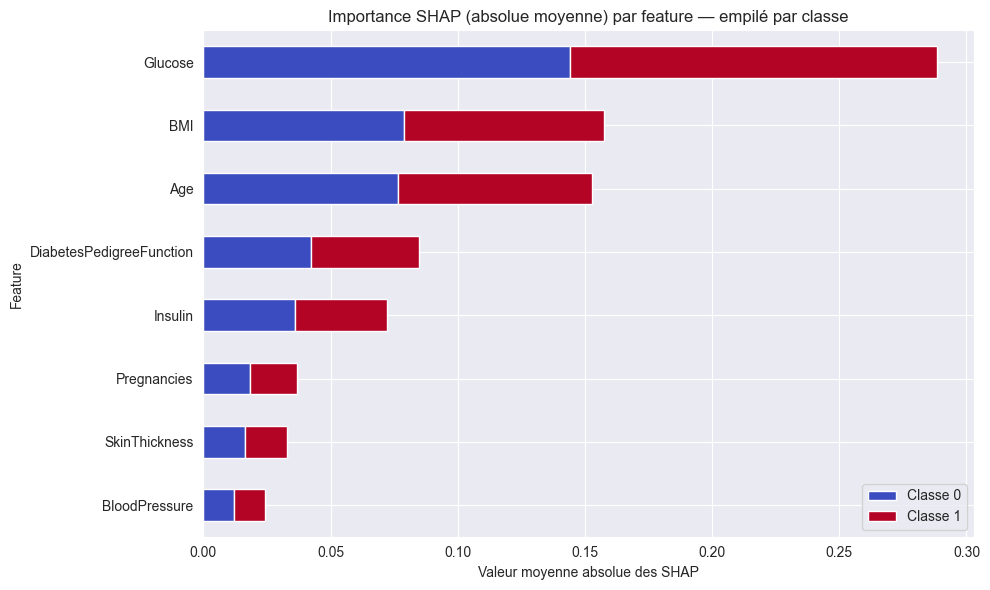

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Moyennes absolues des SHAP values pour chaque classe
mean_abs_shap_class_0 = np.abs(shap_values_rf[:, :, 0]).mean(axis=0)
mean_abs_shap_class_1 = np.abs(shap_values_rf[:, :, 1]).mean(axis=0)

# Récupérer les noms de features
feature_names = X_test_fe.columns if hasattr(X_test_fe, "columns") else [f"feature_{i}" for i in range(X_test_fe.shape[1])]

# Créer un DataFrame
df = pd.DataFrame({
    "Classe 0": mean_abs_shap_class_0,
    "Classe 1": mean_abs_shap_class_1
}, index=feature_names)

# Trier par contribution totale (classe 0 + classe 1)
df["Total"] = df["Classe 0"] + df["Classe 1"]
df = df.sort_values("Total", ascending=True)
df = df.drop(columns="Total")

# Tracer le graphique en barres empilées (horizontal)
df.plot(kind="barh", stacked=True, figsize=(10, 6), colormap="coolwarm")

plt.title("Importance SHAP (absolue moyenne) par feature — empilé par classe")
plt.xlabel("Valeur moyenne absolue des SHAP")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

## Analyse individuelle

In [35]:
# On isole un individu pour observer les force plot
test_individu = X_val.iloc[0]
test_individu

Pregnancies                   5.00
Glucose                      95.00
BloodPressure                72.00
SkinThickness                33.00
Insulin                     120.00
BMI                          37.70
DiabetesPedigreeFunction      0.37
Age                          27.00
Name: 77, dtype: float64

## Force plot

In [26]:
shap.initjs()
# On prend la colonne 1 (classe diabète)
shap_vals_instance = shap_values_rf[0][:, 1]

# Expected value pour la classe 1 (à récupérer aussi)
expected_value_class1 = explainer_rf.expected_value[1]

# Affichage force plot
shap.force_plot(
    expected_value_class1,
    shap_vals_instance,
    X_test_fe.iloc[0]
)

Force plot sur XGBoost

In [36]:
i = 0  # index de l'instance

shap.force_plot(
    explainer_xgb.expected_value,  # expected value scalaire
    shap_values_xgb[i],            # vecteur SHAP (attention au format, voir ci-dessous)
    X_test_fe.iloc[i]
)


### Beeswarm et Dependence plot pour Random Forest

In [71]:
# 1. Explicateur SHAP
explainer_rf = shap.Explainer(rf, X)

# 2. Générer les explications
explanation_rf = explainer_rf(X)

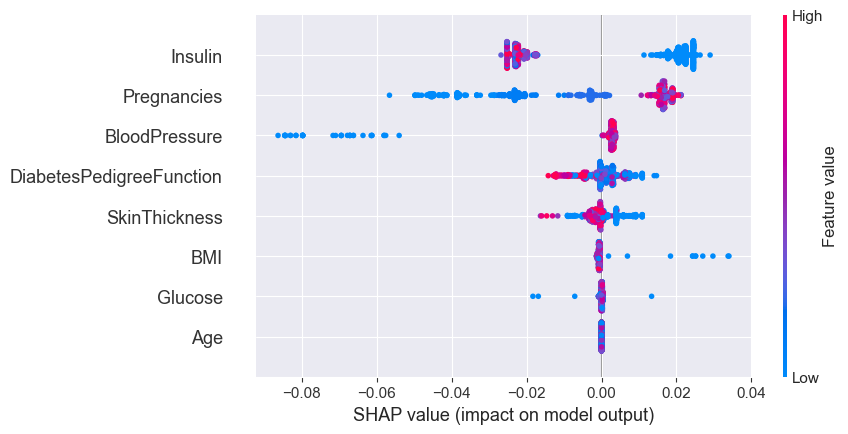

In [94]:
import matplotlib.pyplot as plt


# Extraire les SHAP values pour la classe 0 (classe positive)
shap_values_class1 = explanation_rf.values[:, :, 0]        # (768, 8)
base_values_class1 = explanation_rf.base_values[:, 0]      # (768,)
data = explanation_rf.data
feature_names = explanation_rf.feature_names

# Recréer une Explanation propre pour la classe 1
explanation_class1 = shap.Explanation(
    values=shap_values_class1,
    base_values=base_values_class1,
    data=data,
    feature_names=feature_names
)

# Plot beeswarm pour la classe 1
shap.plots.beeswarm(explanation_class1)

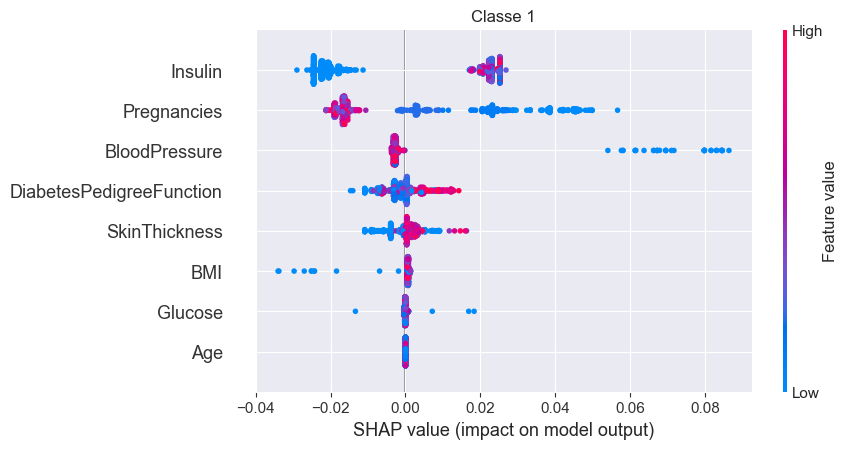

In [93]:
# Classe 1
explanation_class1 = shap.Explanation(
    values=explanation_rf.values[:, :, 1],
    base_values=explanation_rf.base_values[:, 1],
    data=explanation_rf.data,
    feature_names=explanation_rf.feature_names
)

shap.plots.beeswarm(explanation_class1, show=False)
plt.title("Classe 1")

# plt.tight_layout()
plt.show()

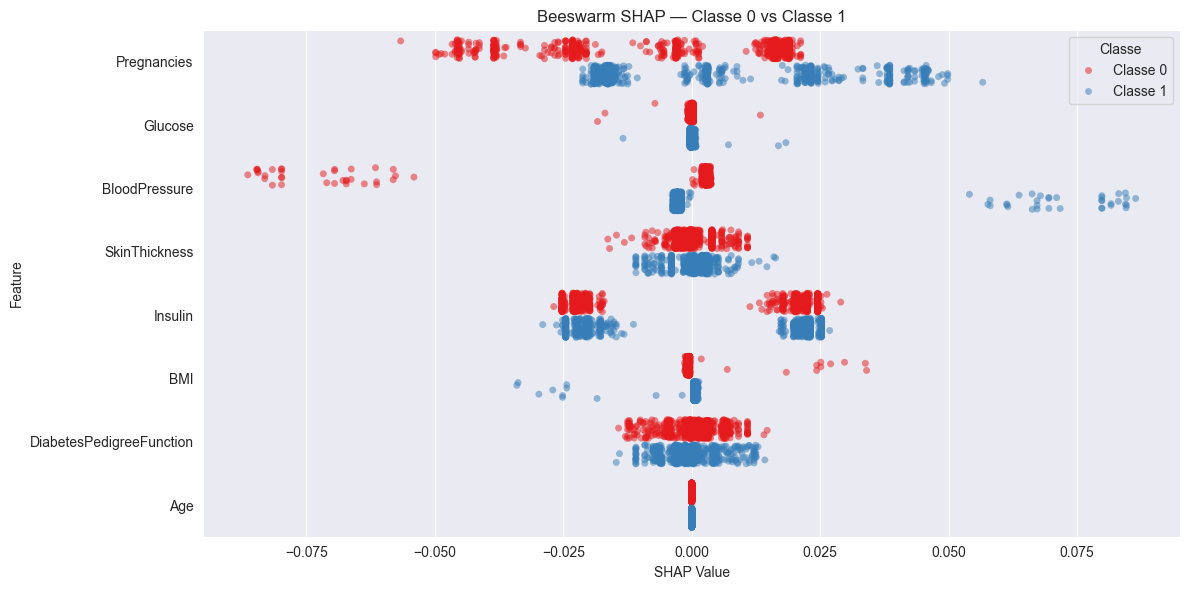

In [96]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Extraire les valeurs
values = explanation_rf.values         # (768, 8, 2)
data = explanation_rf.data             # (768, 8)
features = explanation_rf.feature_names

# 2. On transforme tout ça en DataFrame longue
dfs = []
for class_idx in [0, 1]:
    df_temp = pd.DataFrame(values[:, :, class_idx], columns=features)
    df_temp["Classe"] = f"Classe {class_idx}"
    dfs.append(df_temp)

df_shap = pd.concat(dfs, axis=0)
df_shap["id"] = df_shap.index  # pour identifiant unique

# 3. Melt pour format long
df_long = df_shap.melt(id_vars=["Classe", "id"], var_name="Feature", value_name="SHAP Value")

# 4. Plot beeswarm personnalisé
plt.figure(figsize=(12, 6))
sns.stripplot(
    data=df_long,
    x="SHAP Value",
    y="Feature",
    hue="Classe",
    dodge=True,
    alpha=0.5,
    jitter=0.3,
    palette="Set1",
    orient="h"
)
plt.title("Beeswarm SHAP — Classe 0 vs Classe 1")
plt.legend(title="Classe")
plt.tight_layout()
plt.show()

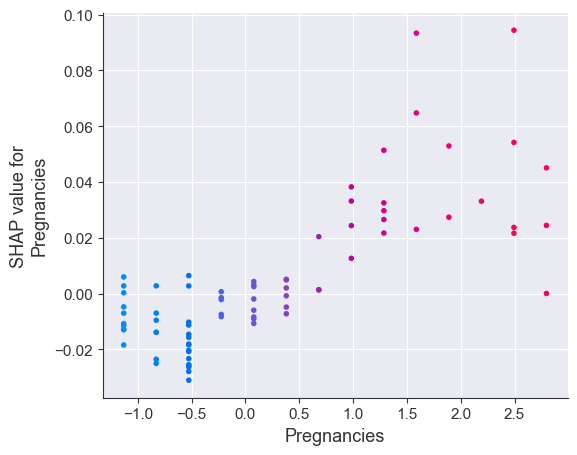

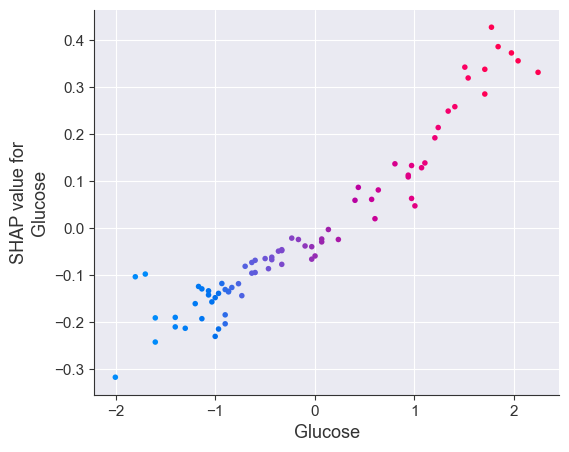

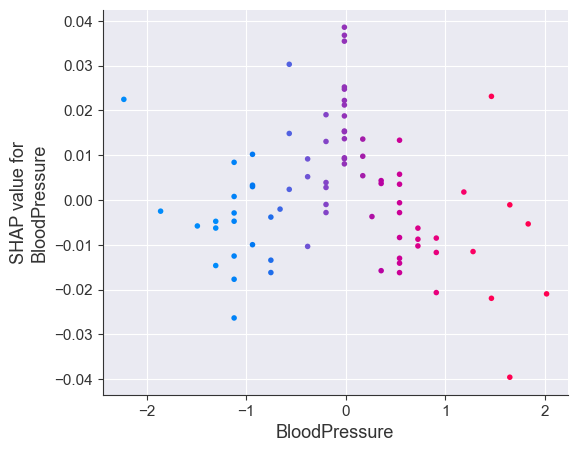

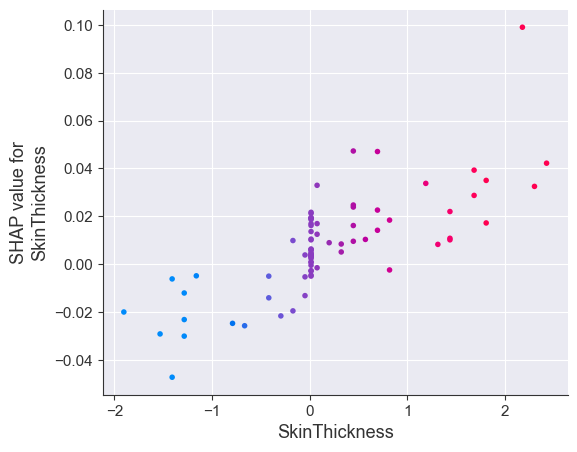

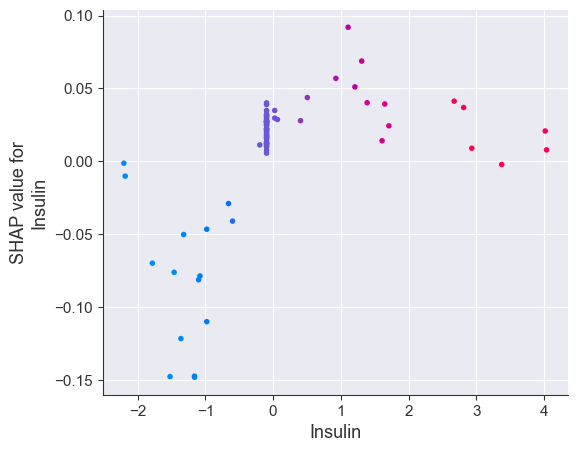

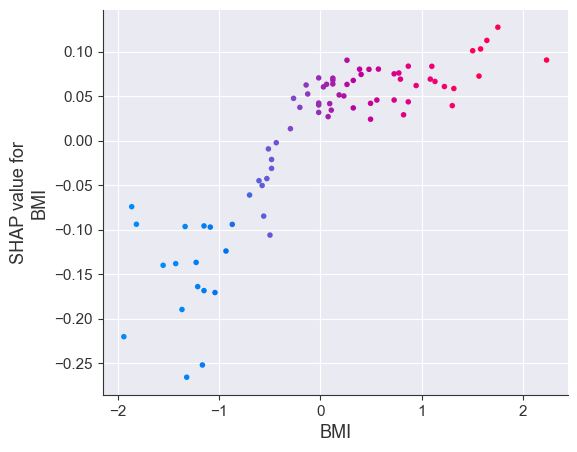

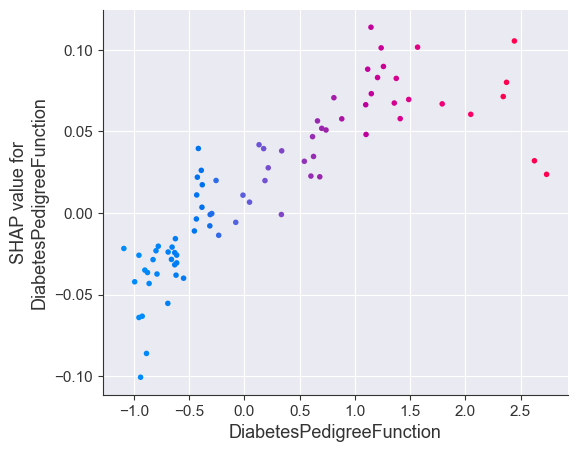

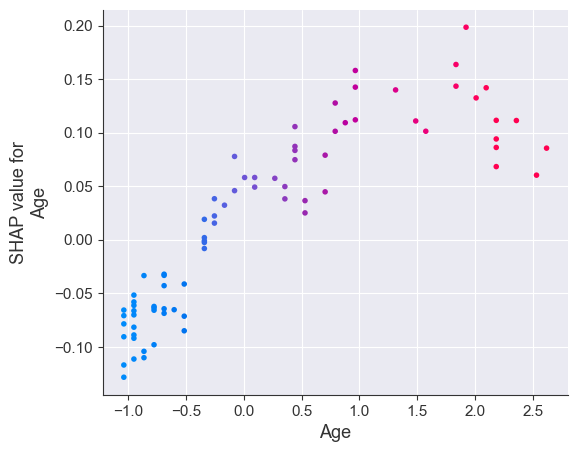

In [117]:
for i, col in enumerate(X_train.columns):
    shap.dependence_plot(col, shap_values_class1_rf, X_test_fe, interaction_index=col)

### Beeswarm et Dependence pour XGBoost

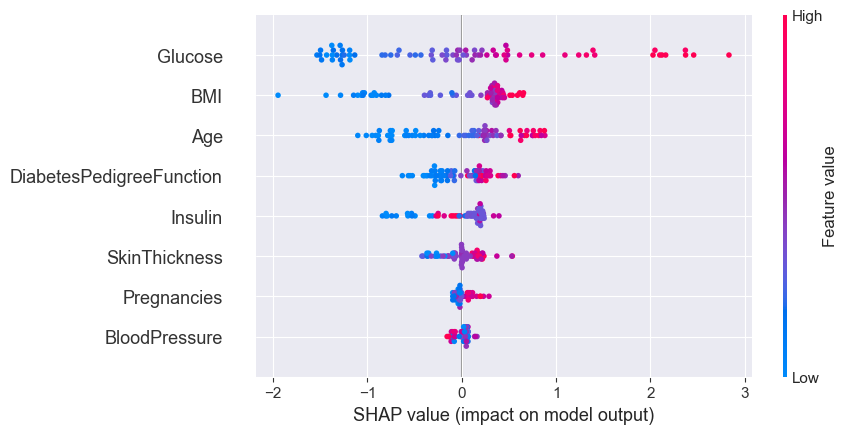

In [123]:
# 1. Création de l'explainer
explain_xgb = shap.Explainer(xgb, X_test_fe)

# 2. Calcul des valeurs SHAP sur X_val
explanation_xgb = explain_xgb(X_test_fe)

# 3. Plot beeswarm
shap.plots.beeswarm(explanation_xgb)

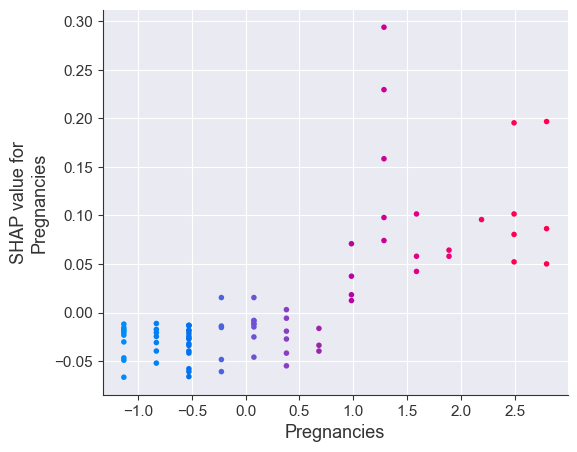

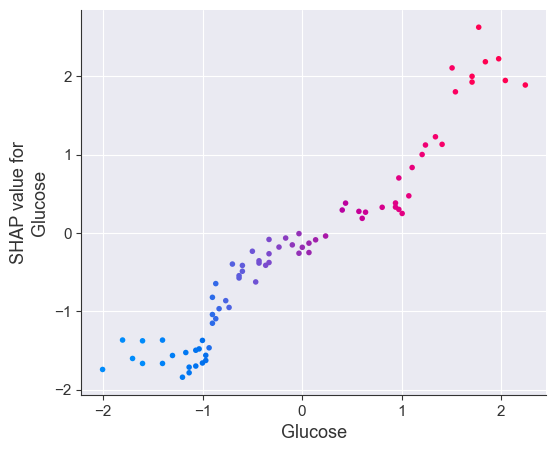

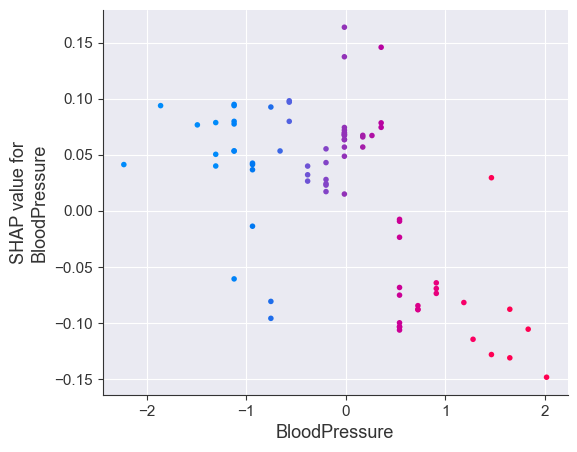

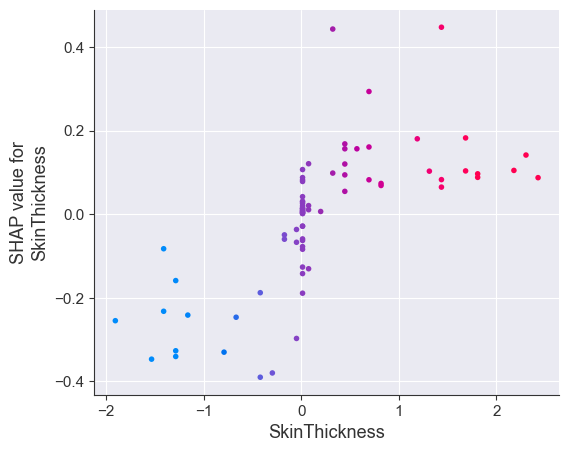

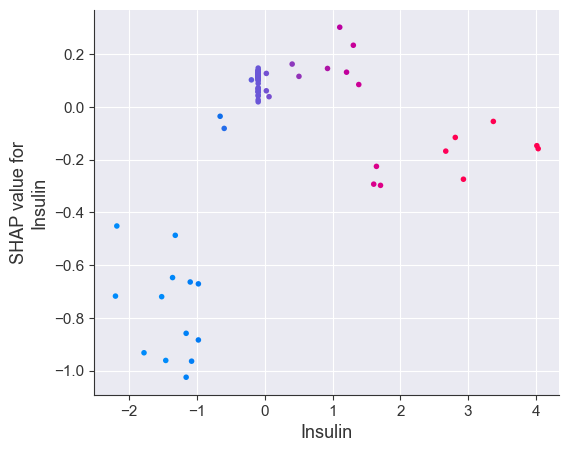

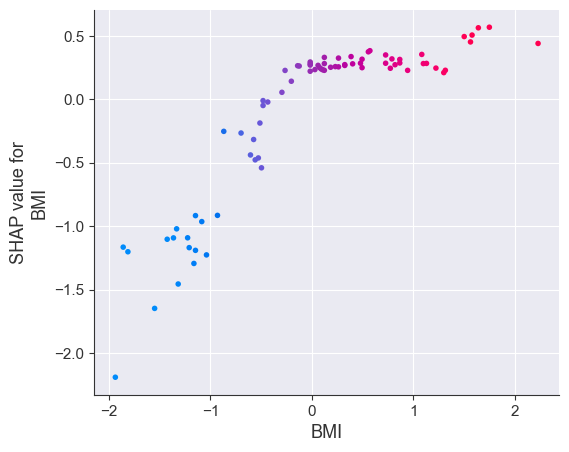

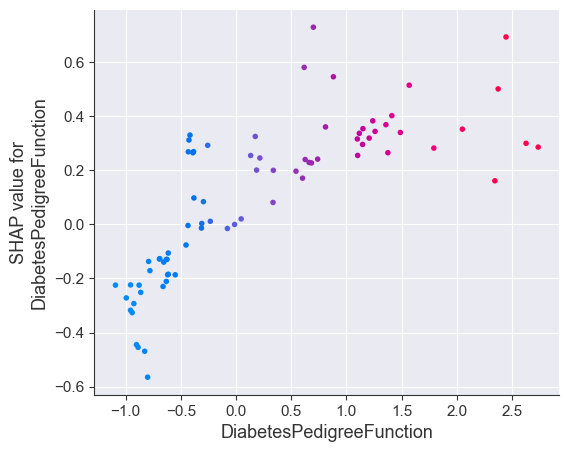

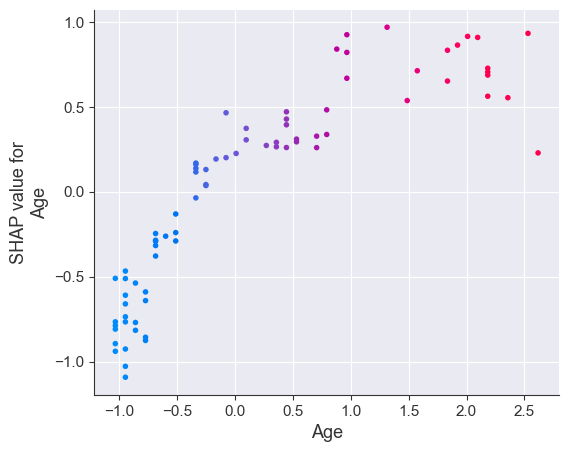

In [107]:
for i, col in enumerate(X_train.columns):
    shap.dependence_plot(col, shap_values_xgb, X_test_fe, interaction_index=col)

# Analyse de la place du sujet isolé dans l'ensemble des autres sujets

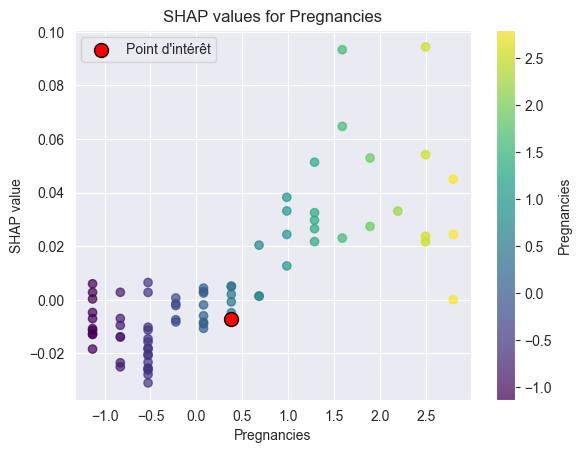

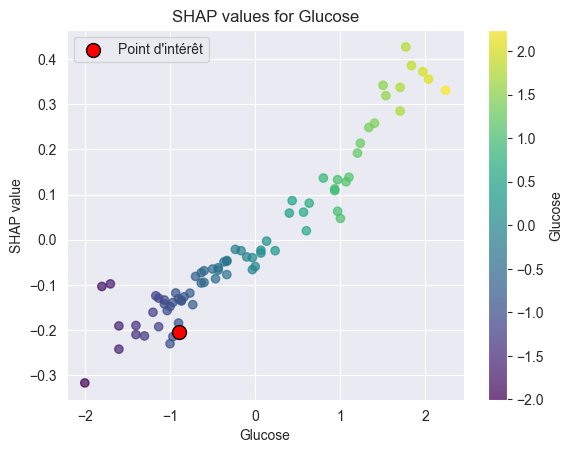

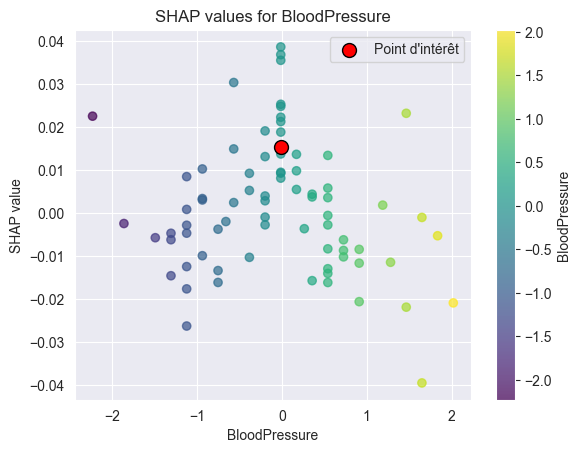

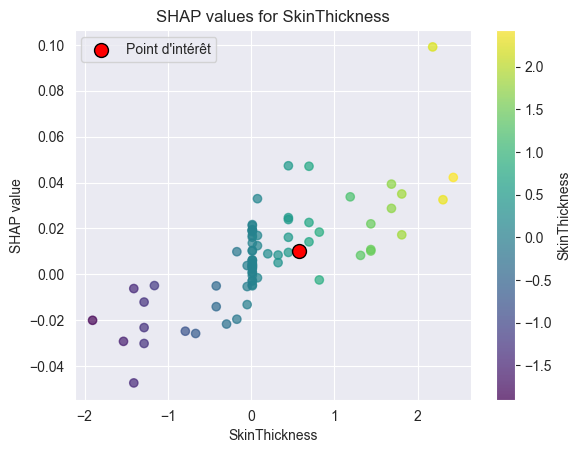

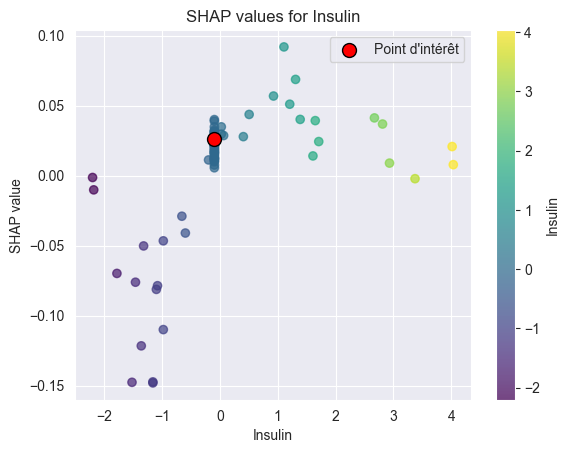

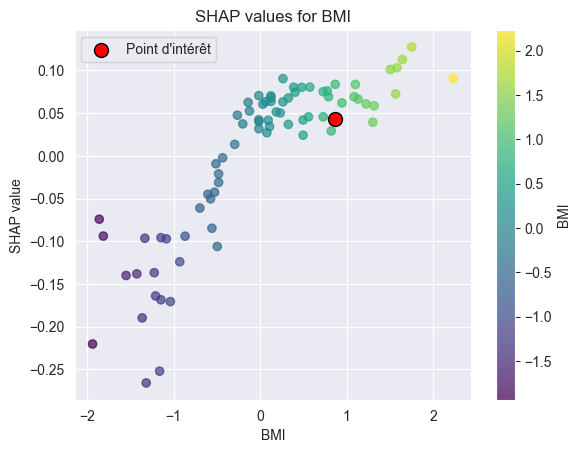

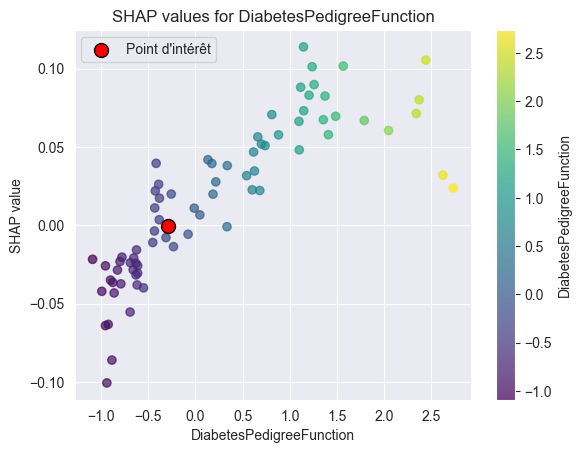

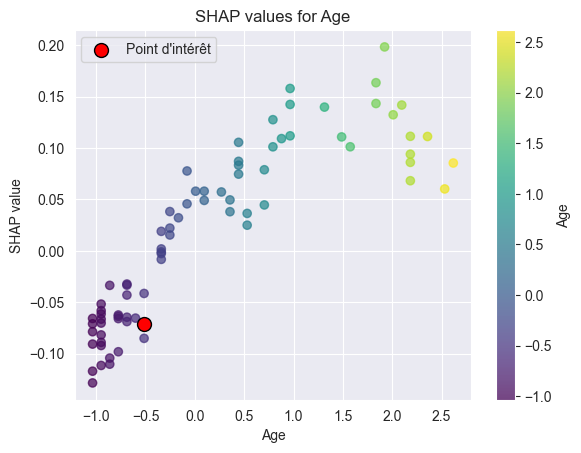

In [119]:
# Random Forest
# Boucle sur chaque feature
for i, col in enumerate(X.columns):
    plt.figure()
    scatter = plt.scatter(
        X_test_fe[col],                     # valeurs features pour toutes les instances
        shap_values_class1_rf[:, i],  # valeurs SHAP pour la feature i, classe 1
        c=X_test_fe[col],                  # couleur en fonction de la valeur feature
        cmap="viridis",
        alpha=0.7
    )
    # Point d'intérêt (première observation) en rouge
    plt.scatter(
        X_test_fe.iloc[0][col],
        shap_values_class1_rf[0, i],
        color='red',
        edgecolor='black',
        s=100,
        zorder=3,
        label="Point d'intérêt"
    )
    plt.xlabel(col)
    plt.ylabel("SHAP value")
    plt.title(f"SHAP values for {col}")
    plt.colorbar(scatter, label=col)
    plt.legend()
    plt.show()


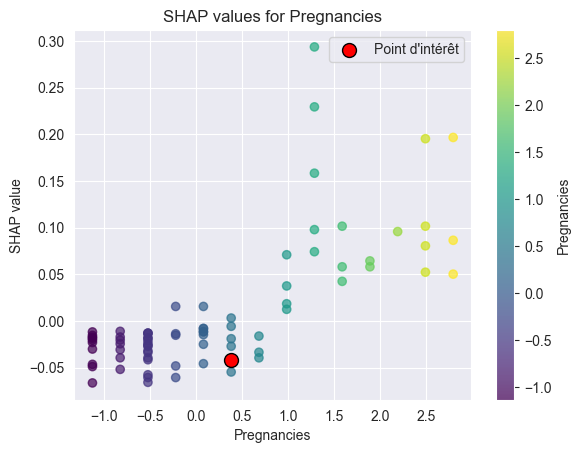

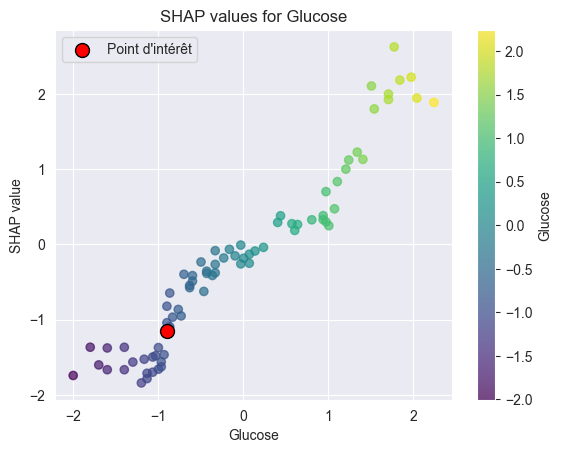

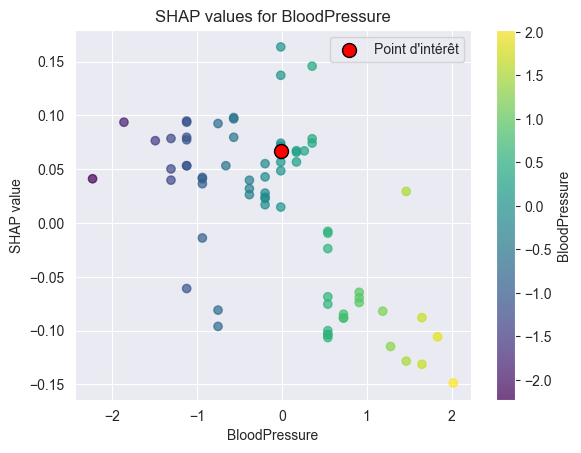

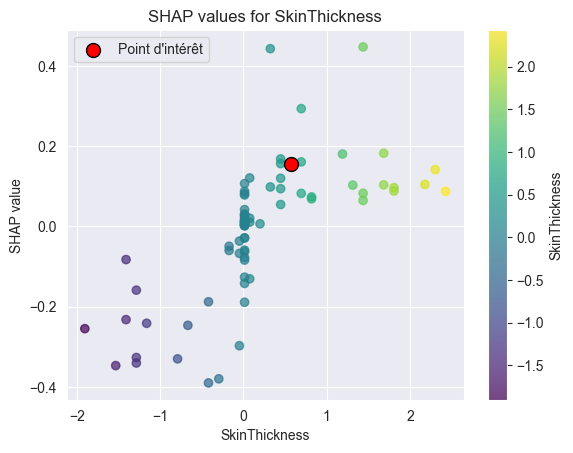

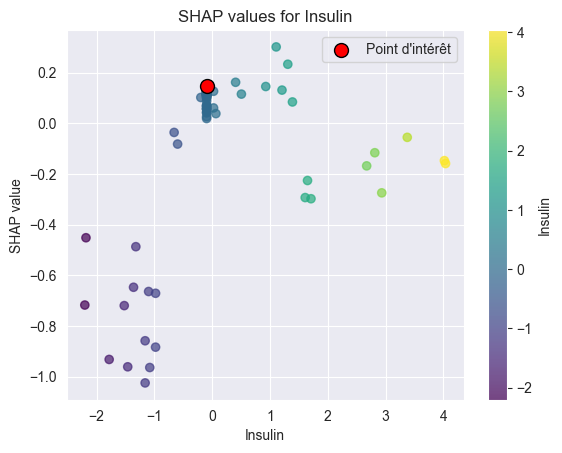

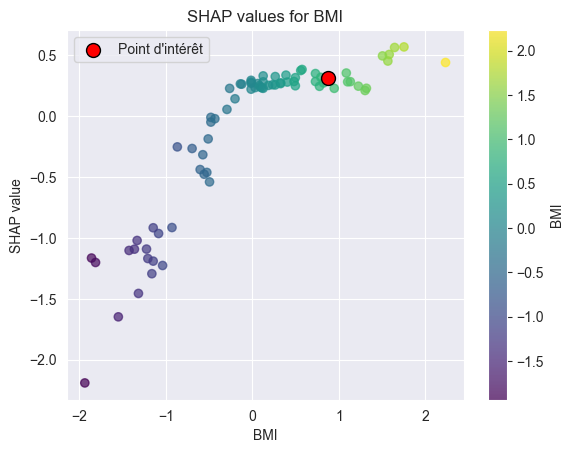

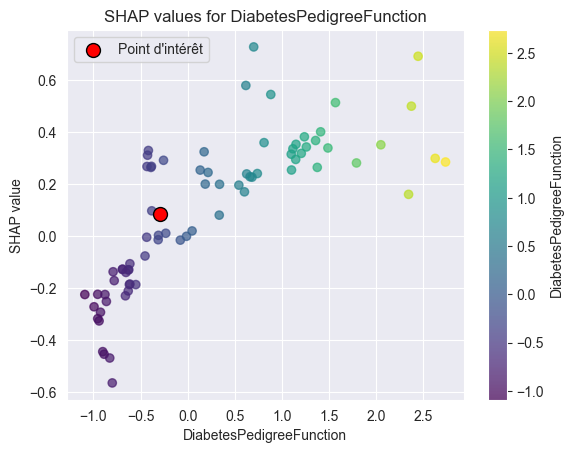

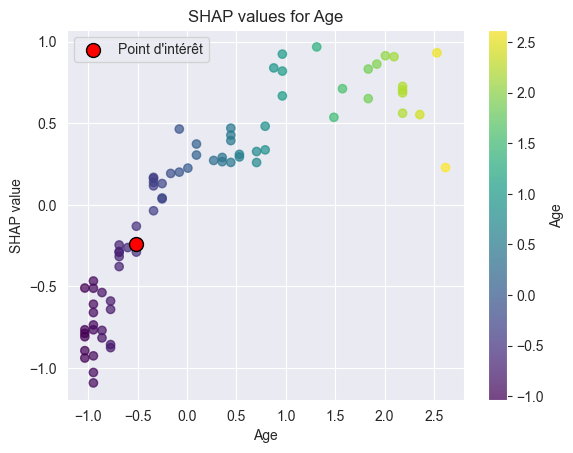

In [116]:
# XGBoost
# Boucle sur chaque feature
for i, col in enumerate(X_test_fe.columns):
    plt.figure()
    scatter = plt.scatter(
        X_test_fe[col],                     # valeurs features pour toutes les instances
        shap_values_xgb[:, i],  # valeurs SHAP pour la feature i, classe 1
        c=X_test_fe[col],                  # couleur en fonction de la valeur feature
        cmap="viridis",
        alpha=0.7
    )
    # Point d'intérêt (première observation) en rouge
    plt.scatter(
        X_test_fe.iloc[0][col],
        shap_values_xgb[0, i],
        color='red',
        edgecolor='black',
        s=100,
        zorder=3,
        label="Point d'intérêt"
    )
    plt.xlabel(col)
    plt.ylabel("SHAP value")
    plt.title(f"SHAP values for {col}")
    plt.colorbar(scatter, label=col)
    plt.legend()
    plt.show()


## Conclusion

On remarque que pour le premier individu du dataset qui est diabétique, le glucose et l'age on représenté un impacte important dans sont diagnostic (25% des variables justifi plus de 50% du diagnostic). Ce sont donc des valeurs significatives dans notre modèle.